In [1]:
import matplotlib.pyplot as plt
from generate_analyitcs import GeneratedAnalyitcs

In [2]:
gen_an = GeneratedAnalyitcs("sqlite:///complexityweekend.sqlite")

['general', 'flipped-discussion', 'introductions', 'explore-KMS', 'i-need-a-team', 'random', 'explore-crowd-meter', 'explore-complexity', 'explore-ecosystems', 'explore-computation', 'explore-sociophysics', 'flipped-classroom', 'explore-foodforest', 'explore-cities', 'tech-support', 'explore-economics', 'explore-health', 'explore-tech-onboard', 'explore-neuro', 'explore-art', 'requests', 'explore-sensemaking', 'explore-embodiment', 'explore-data-gov', 'explore-climate', 'explore-mind-village', 'explore-agent-based', 'explore-entrepreneur', 'ask-the-facilitators', 'explore-complexbooks', 'explore-engineering', 'explore-quotes', 'explore-scalefreecog', 'explore-governance', 'explore-data-viz', 'explore-mentalhealth', 'reading-list', 'explore-elections', 'explore-sustainable', 'explore-pandemics']


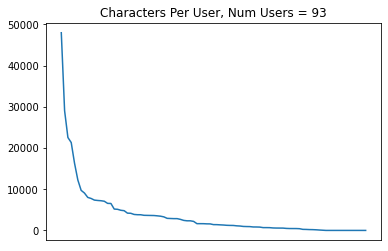

In [3]:
plt.plot(gen_an.characters_per_user["users_list"],gen_an.characters_per_user["characters_list"])
plt.title("Characters Per User, Num Users = " + str(len(gen_an.characters_per_user["users_list"])))
plt.gca().axes.xaxis.set_visible(False)
plt.show()

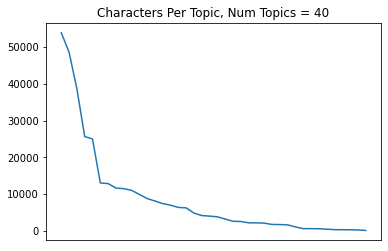

In [4]:
plt.plot(gen_an.characters_per_topic["topics_list"],gen_an.characters_per_topic["characters_list"])
plt.title("Characters Per Topic, Num Topics = " + str(len(gen_an.characters_per_topic["topics_list"])))
plt.gca().axes.xaxis.set_visible(False)
plt.show()

In [5]:
users = [] 
for sublist in messages_per_user:
    users.append(sublist[0])
characters = [] 
for sublist in messages_per_user:
    characters.append(sublist[1])
plt.plot(users,characters)
plt.title("Messages Per User, Num Users = " + str(len(users)))
plt.gca().axes.xaxis.set_visible(False)
plt.show()

NameError: name 'messages_per_user' is not defined

In [ ]:
users = [] 
for i in range(len(messages_per_user)):
    users.append(i)
characters = [] 
for sublist in messages_per_user:
    characters.append(sublist[1])
plt.loglog(users,characters)
plt.title("Messages Per User, Num Users = " + str(len(users)))
plt.gca().axes.xaxis.set_visible(False)
plt.show()

In [ ]:
topics = [] 
for sublist in messages_per_topic:
    topics.append(sublist[0])
characters = [] 
for sublist in messages_per_topic:
    characters.append(sublist[1])
plt.plot(topics,characters)
plt.title("Messages Per Topic, Num Topics = " + str(len(topics)))
plt.gca().axes.xaxis.set_visible(False)
plt.show()

In [ ]:
topics = [] 
for sublist in number_users_per_topic:
    topics.append(sublist[0])
users = [] 
for sublist in number_users_per_topic:
    users.append(sublist[1])
plt.pie(users, labels=topics,autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Num Of Users Per Topic")
plt.axis('equal')
plt.show()